In [48]:
#Import the dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [32]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [50]:
# import the citipy module.
from citipy import citipy

In [51]:
# Create a list for holding the cities.
cities=[]
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

627

In [52]:
# Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [53]:
# Starting URL for weather map API call.
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [54]:
#Import the datetime module from the datetime library.
from datetime import datetime

In [55]:
#Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 ==0 and i>=50):
        set_count += 1
        record_count = 1
        
    #Create endpoint url for each city.
    city_url = url + "&q=" + city
        
    #log the url,record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
    #Add 1 to the record count.
    record_count += 1
        
    #Run an API request for each of the cities.
    try:
         #Parse the JSON and retrieve the data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
            
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                             "Lat": city_lat,
                             "Lng": city_lng,
                             "Max Temp": city_max_temp,
                             "Humidity": city_humidity,
                             "Cloudiness": city_clouds,
                             "Wind Speed": city_wind,
                             "Country": city_country,
                             "Date": city_date})
    #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
#Indicate the data loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | flinders
Processing Record 2 of Set 1 | magole
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | esperance
Processing Record 5 of Set 1 | provideniya
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | saint-augustin
Processing Record 8 of Set 1 | noumea
Processing Record 9 of Set 1 | torbay
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | moerai
Processing Record 14 of Set 1 | ginda
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | ancud
Processing Record 18 of Set 1 | codrington
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | omboue
Processing Record 21 of Set 1 | mangrol
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | vila velha
Processing

Processing Record 40 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 41 of Set 4 | belmonte
Processing Record 42 of Set 4 | krasnorechenskiy
Processing Record 43 of Set 4 | airai
Processing Record 44 of Set 4 | madimba
Processing Record 45 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 4 | macheng
Processing Record 47 of Set 4 | seymchan
Processing Record 48 of Set 4 | noyabrsk
Processing Record 49 of Set 4 | adrar
Processing Record 50 of Set 4 | yumen
Processing Record 1 of Set 5 | beyneu
Processing Record 2 of Set 5 | opuwo
Processing Record 3 of Set 5 | pochutla
Processing Record 4 of Set 5 | qandahar
City not found. Skipping...
Processing Record 5 of Set 5 | newtonhill
Processing Record 6 of Set 5 | gunjur
Processing Record 7 of Set 5 | beloha
Processing Record 8 of Set 5 | whangarei
Processing Record 9 of Set 5 | ulladulla
Processing Record 10 of Set 5 | los llanos de aridane
Processing Record 11 of Set 5 | lehrte
Processing Record

Processing Record 28 of Set 8 | fairbanks
Processing Record 29 of Set 8 | bereda
Processing Record 30 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 31 of Set 8 | hasaki
Processing Record 32 of Set 8 | hamilton
Processing Record 33 of Set 8 | urucara
Processing Record 34 of Set 8 | kuri
Processing Record 35 of Set 8 | auki
Processing Record 36 of Set 8 | bargal
City not found. Skipping...
Processing Record 37 of Set 8 | imaichi
Processing Record 38 of Set 8 | moa
Processing Record 39 of Set 8 | fomboni
Processing Record 40 of Set 8 | soderhamn
Processing Record 41 of Set 8 | itoman
Processing Record 42 of Set 8 | tiquisio
Processing Record 43 of Set 8 | ainring
Processing Record 44 of Set 8 | nome
Processing Record 45 of Set 8 | dolbeau
City not found. Skipping...
Processing Record 46 of Set 8 | blagoyevo
Processing Record 47 of Set 8 | joniskis
Processing Record 48 of Set 8 | lata
Processing Record 49 of Set 8 | key west
Processing Record 50 of Set 8 |

Processing Record 19 of Set 12 | cururupu
Processing Record 20 of Set 12 | bandarawela
Processing Record 21 of Set 12 | ciras
City not found. Skipping...
Processing Record 22 of Set 12 | hornepayne
Processing Record 23 of Set 12 | ola
Processing Record 24 of Set 12 | ako
Processing Record 25 of Set 12 | carutapera
Processing Record 26 of Set 12 | azimur
City not found. Skipping...
Processing Record 27 of Set 12 | bilma
Processing Record 28 of Set 12 | karaton
Processing Record 29 of Set 12 | ca mau
Processing Record 30 of Set 12 | half moon bay
Processing Record 31 of Set 12 | latung
Processing Record 32 of Set 12 | kenosha
Processing Record 33 of Set 12 | kadykchan
City not found. Skipping...
Processing Record 34 of Set 12 | sinjai
Processing Record 35 of Set 12 | shimoda
Processing Record 36 of Set 12 | namatanai
Processing Record 37 of Set 12 | belyy yar
Processing Record 38 of Set 12 | vyara
Processing Record 39 of Set 12 | mastic
Processing Record 40 of Set 12 | kurilsk
Processing

In [58]:
len(city_data)

581

In [59]:
#Convert the array of dictionaries to a panda dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Flinders,-34.5833,150.8552,58.37,65,99,5.01,AU,2021-07-19 01:38:50
1,Magole,-6.3667,37.3667,63.43,79,10,1.70,TZ,2021-07-19 01:38:50
2,Butaritari,3.0707,172.7902,83.73,72,100,9.08,KI,2021-07-19 01:38:50
3,Esperance,-33.8667,121.9000,53.44,76,80,14.50,AU,2021-07-19 01:38:50
4,Provideniya,64.3833,-173.3000,50.11,81,90,13.42,RU,2021-07-19 01:38:50
5,Vaini,-21.2000,-175.2000,80.76,83,20,10.36,TO,2021-07-19 01:38:51
6,Saint-Augustin,51.2260,-58.6502,67.59,54,0,1.21,CA,2021-07-19 01:38:51
7,Noumea,-22.2763,166.4572,73.38,66,85,6.46,NC,2021-07-19 01:38:51
8,Torbay,47.6666,-52.7314,65.17,75,75,12.66,CA,2021-07-19 01:38:51
9,East London,-33.0153,27.9116,60.06,28,0,6.85,ZA,2021-07-19 01:35:27


In [60]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Flinders,AU,2021-07-19 01:38:50,-34.5833,150.8552,58.37,65,99,5.01
1,Magole,TZ,2021-07-19 01:38:50,-6.3667,37.3667,63.43,79,10,1.70
2,Butaritari,KI,2021-07-19 01:38:50,3.0707,172.7902,83.73,72,100,9.08
3,Esperance,AU,2021-07-19 01:38:50,-33.8667,121.9000,53.44,76,80,14.50
4,Provideniya,RU,2021-07-19 01:38:50,64.3833,-173.3000,50.11,81,90,13.42
5,Vaini,TO,2021-07-19 01:38:51,-21.2000,-175.2000,80.76,83,20,10.36
6,Saint-Augustin,CA,2021-07-19 01:38:51,51.2260,-58.6502,67.59,54,0,1.21
7,Noumea,NC,2021-07-19 01:38:51,-22.2763,166.4572,73.38,66,85,6.46
8,Torbay,CA,2021-07-19 01:38:51,47.6666,-52.7314,65.17,75,75,12.66
9,East London,ZA,2021-07-19 01:35:27,-33.0153,27.9116,60.06,28,0,6.85


In [62]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

#Export the city_data into a csv.
city_data_df.to_csv(output_data_file, index_label = "City_ID")


In [64]:
#Extract relevant fields from the dataframe for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [65]:
#Import the time module.
import time

# Get today's date.
today = time.strftime("%x")
today

'07/18/21'

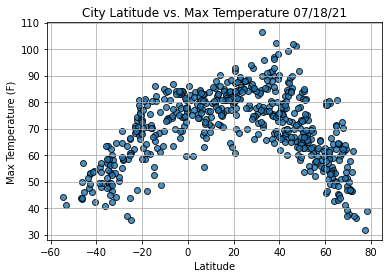

In [66]:
#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Max Temperature " + time.strftime("%x") )
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

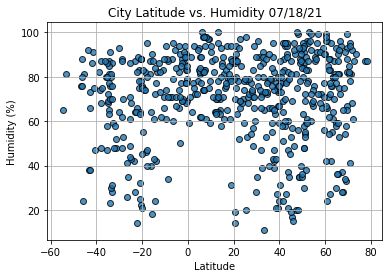

In [67]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Humidity " + time.strftime("%x") )
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()


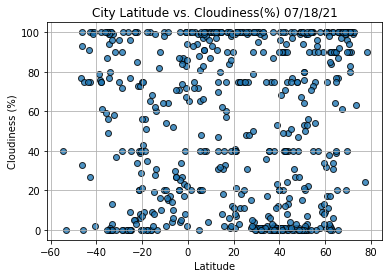

In [68]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Cloudiness(%) " + time.strftime("%x") )
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot.
plt.show()

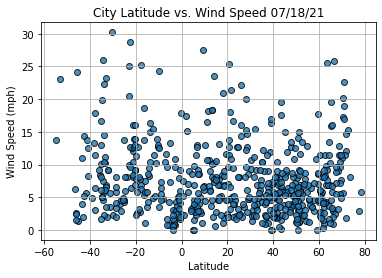

In [69]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Wind Speed " + time.strftime("%x") )
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot.
plt.show()

In [70]:
#Import linear regression from the Scipy stats module.
from scipy.stats import linregress

In [71]:
#Create a function to create perform linear regression on the weather data  and  
# plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y-values" from the slope and the intercept.
    regress_values = x_values * slope + intercept
    
    #Get the equation of the line.
    line_eq = "y= " + str(round(slope,2)) + "x + " +str(round(intercept,2))
    
    #Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color= "red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value is {r_value:.3f}")

In [72]:
index13 = city_data_df.loc[13]
index13

City                        Ginda
Country                        IN
Date          2021-07-19 01:38:52
Lat                       30.6945
Lng                       78.4932
Max Temp                    68.04
Humidity                       96
Cloudiness                    100
Wind Speed                    1.3
Name: 13, dtype: object

In [73]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
576    False
577     True
578     True
579     True
580     True
Name: Lat, Length: 581, dtype: bool

In [74]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Butaritari,KI,2021-07-19 01:38:50,3.0707,172.7902,83.73,72,100,9.08
4,Provideniya,RU,2021-07-19 01:38:50,64.3833,-173.3000,50.11,81,90,13.42
6,Saint-Augustin,CA,2021-07-19 01:38:51,51.2260,-58.6502,67.59,54,0,1.21
8,Torbay,CA,2021-07-19 01:38:51,47.6666,-52.7314,65.17,75,75,12.66
13,Ginda,IN,2021-07-19 01:38:52,30.6945,78.4932,68.04,96,100,1.30


In [75]:
# Create Northern and Southern Hemisphere dataframes.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

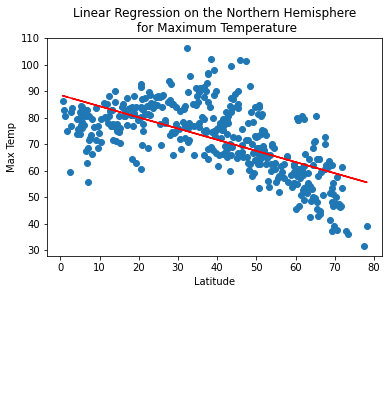

The r-value is -0.635


In [76]:
#linear regression on the northern hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for Maximum Temperature", "Max Temp", (10,-20))

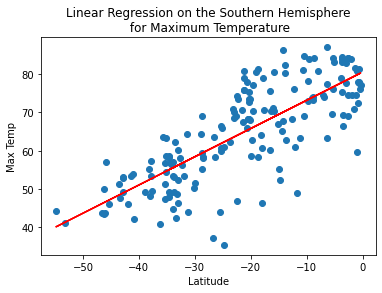

The r-value is 0.785


In [77]:
#Linear regression on the southern hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere\n for Maximum Temperature", "Max Temp", (-50,90))


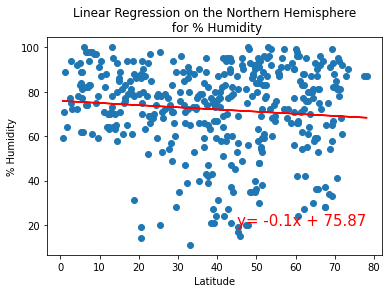

The r-value is -0.097


In [78]:
#linear regression on the northern hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for % Humidity", "% Humidity", (45,20))

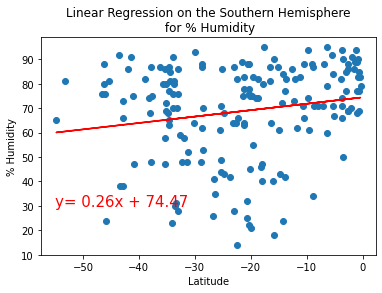

The r-value is 0.183


In [79]:
#Linear regression on the southern hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere\n for % Humidity", "% Humidity", (-55,30))

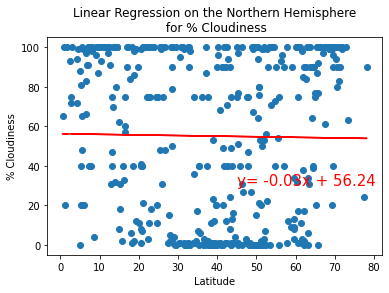

The r-value is -0.015


In [80]:
#linear regression on the northern hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for % Cloudiness", "% Cloudiness", (45,30))

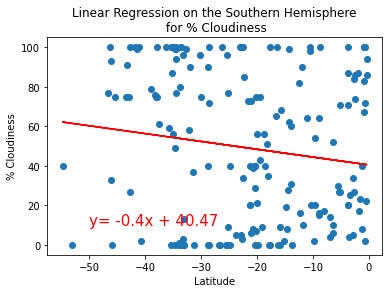

The r-value is -0.143


In [81]:
#Linear regression on the southern hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere\n for % Cloudiness", "% Cloudiness", (-50,10))

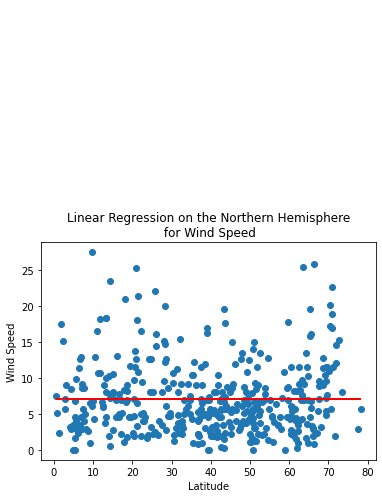

The r-value is -0.001


In [82]:
#linear regression on the northern hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for Wind Speed", "Wind Speed", (10,60))

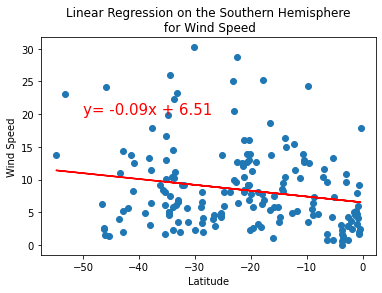

The r-value is -0.199


In [83]:
#Linear regression on the southern hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere\n for Wind Speed", "Wind Speed", (-50,20))